In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings

import cufflinks as cf
import plotly as py
from plotly.offline import init_notebook_mode,plot,iplot

warnings.filterwarnings("ignore", category = DeprecationWarning)
warnings.filterwarnings("ignore", category = FutureWarning)

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import scale, StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
!pip install catboost
import catboost
from catboost import CatBoostClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
#import dataset
from sklearn.datasets import load_breast_cancer

In [ ]:
df = load_breast_cancer()
print(df.DESCR)

In [ ]:
X = pd.DataFrame(data = df.data, columns=df.feature_names)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
y = df.target

In [ ]:
feature, target = load_breast_cancer(return_X_y=True)

In [ ]:
feature = X
target = y

In [ ]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
df.target_names

array(['malignant', 'benign'], dtype='<U9')

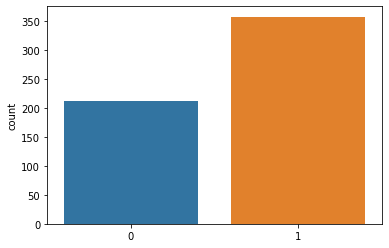

In [ ]:
sns.countplot(df["target"])  # 0=malignant 1=benign

# KNN

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [ ]:
knn_model = KNeighborsClassifier().fit(X_train, y_train)

In [ ]:
knn_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.9590643274853801

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn_params = {"n_neighbors": [1,3,5,8,10,20,50,43,25,17]}

In [ ]:
knn_cv_model = GridSearchCV(knn, knn_params, cv=10, n_jobs=-1).fit(X_train, y_train)

In [ ]:
knn_cv_model.best_params_

{'n_neighbors': 17}

In [91]:
knn_tuned = KNeighborsClassifier(n_neighbors = 17).fit(X_train, y_train)

In [ ]:
y_pred = knn_tuned.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.9649122807017544

# SVM

In [ ]:
svm_model = SVC(kernel = "linear").fit(X_train, y_train)
svm_model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = svm_model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.9649122807017544

In [ ]:
svm = SVC()

In [ ]:
svm_params = {"C": np.arange(1,5), "kernel": ["linear", "rbf"]}

In [ ]:
svm_cv_model = GridSearchCV(svm, svm_params, cv=5, n_jobs=-1, verbose=2).fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   40.3s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   41.0s finished


In [ ]:
svm_cv_model.best_params_

{'C': 4, 'kernel': 'linear'}

In [94]:
svm_tuned = SVC(C = 4, kernel = "linear").fit(X_train, y_train)

In [95]:
y_pred = svm_tuned.predict(X_test)

In [96]:
accuracy_score(y_test, y_pred)

0.9766081871345029

# YAPAY SİNİR AĞLARI

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [ ]:
scaler.fit(X_test)
X_test = scaler.transform(X_test)

In [ ]:
mlpc_model = MLPClassifier().fit(X_train, y_train)
mlpc_model

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
y_pred = mlpc_model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.9883040935672515

In [ ]:
mlpc = MLPClassifier(solver="lbfgs", activation="logistic")

In [ ]:
mlpc_params = {"alpha":[0.1,0.0001,0.5,1,5],
               "hidden_layer_sizes": [(100,100),(3,5),(10,10)]}

In [ ]:
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, cv=5, n_jobs=-1, verbose=2).fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done  72 out of  75 | elapsed:    8.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    8.1s finished


In [ ]:
mlpc_cv_model.best_params_

{'alpha': 1, 'hidden_layer_sizes': (3, 5)}

In [ ]:
mlpc_tuned = MLPClassifier(solver = "lbfgs", activation = "logistic", alpha=1, hidden_layer_sizes=(3,5)).fit(X_train, y_train)

In [ ]:
y_pred = mlpc_tuned.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.9824561403508771

## RANDOM FORESTS

In [ ]:
rf_model = RandomForestClassifier().fit(X_train, y_train)
rf_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.9707602339181286

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf_params = {"max_features": [3,5,7,9],
           "min_samples_split": [2,5,10,20],
           "n_estimators": [100,200,500]}

In [ ]:
rf_cv_model = GridSearchCV(rf, rf_params, cv=5, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  1.7min finished


In [ ]:
rf_cv_model.best_params_

{'max_features': 5, 'min_samples_split': 5, 'n_estimators': 100}

In [ ]:
rf_tuned = RandomForestClassifier(max_features = 5, min_samples_split = 5, n_estimators =100).fit(X_train, y_train)

In [ ]:
y_pred = rf_tuned.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.9766081871345029

# Light GBM

In [ ]:
import lightgbm
from lightgbm import LGBMClassifier

In [ ]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)
lgbm_model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
y_pred = lgbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9649122807017544

In [ ]:
lgbm = LGBMClassifier()

In [ ]:
lgbm_params = {"learning_rate": [0.001,0.01,0.1],
               "n_estimators":[200,500,100],
               "max_depth":[1,5,35,8]}

In [ ]:
lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, cv=5, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   21.5s finished


In [ ]:
lgbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 100}

In [ ]:
lgbm_tuned = LGBMClassifier(learning_rate= 0.1, max_depth= 1, n_estimators= 100).fit(X_train, y_train)

In [ ]:
y_pred = lgbm_tuned.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.9649122807017544

## MODEL SONUÇLARININ KARŞILAŞTIRILMASI

In [97]:
modeller = [knn_tuned, svm_tuned, mlpc_tuned, rf_tuned, lgbm_tuned]

sonuc = []
sonuclar = pd.DataFrame(columns = ["Modeller", "Accuracy"])     

for model in modeller:
  isimler = model.__class__.__name__
  y_pred = model.predict(X_test)
  dogruluk = accuracy_score(y_test, y_pred)
  sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns = ["Modeller", "Accuracy"])
  sonuclar = sonuclar.append(sonuc)

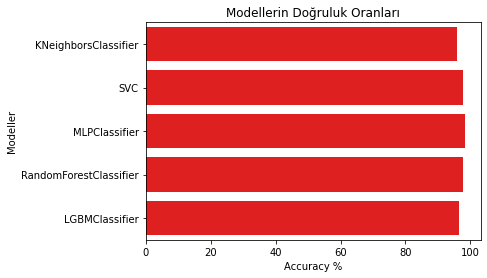

In [98]:
sns.barplot(x='Accuracy', y='Modeller', data=sonuclar, color='r')
plt.xlabel('Accuracy %')
plt.title('Modellerin Doğruluk Oranları');

In [99]:
sonuclar

,Modeller,Accuracy
0,KNeighborsClassifier,95.906433
0,SVC,97.660819
0,MLPClassifier,98.245614
0,RandomForestClassifier,97.660819
0,LGBMClassifier,96.491228
